In [1]:
from __future__ import print_function, division

from scipy.io import wavfile
import pandas as pd
import numpy as np 
import sys
import os

sys.path.append('../scripts')

import thinkdsp
import thinkplot

In [2]:
sampleRate, data = wavfile.read('../data/audio/01_10003_1-04_Shri_Visvanatham.wav')
shriVisvanatham = thinkdsp.read_wave("../data/audio/01_10003_1-04_Shri_Visvanatham.wav")

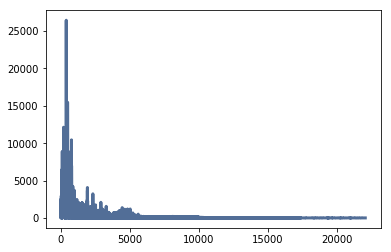

In [3]:
shriVisvanatham.apodize()
spectrum = shriVisvanatham.make_spectrum()
spectrum.plot()

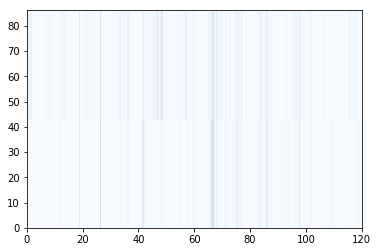

In [4]:
spectogram = shriVisvanatham.make_spectrogram(seg_length=1024)
spectogram.plot(high=150)

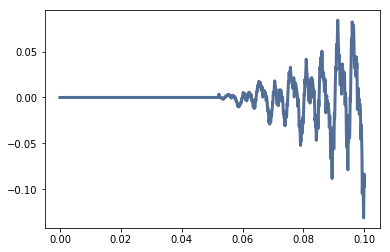

In [5]:
# Windows and Convolutions
# Segment the wave
segment = shriVisvanatham.segment(duration=.1)
segment.plot()

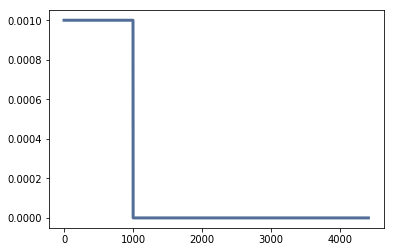

In [6]:
# Create window and apply to the wave 
window = np.ones(1000)
window /= sum(window)

N = len(segment)
padded = thinkdsp.zero_pad(window, N)
thinkplot.plot(padded)

In [7]:
# Compute a convolution

smoothed = np.zeros(N)
rolled = padded.copy()
for i in range(N):
    smoothed[i] = sum(rolled * segment.ys)
    rolled = np.roll(rolled, 1)

No handles with labels found to put in legend.


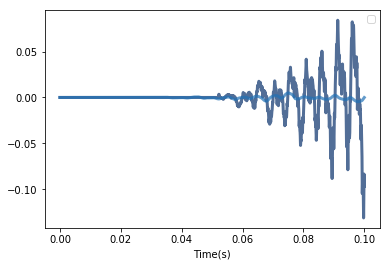

In [8]:
segment.plot()
smooth = thinkdsp.Wave(smoothed, framerate=sampleRate)
smooth.plot()
thinkplot.config(xlabel='Time(s)')

No handles with labels found to put in legend.


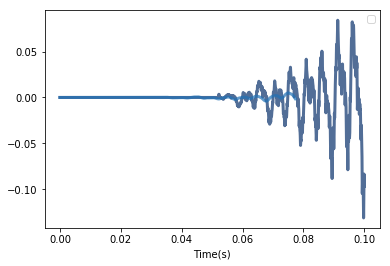

In [9]:
segment.plot()
ys = np.convolve(segment.ys, window, mode='valid')
smooth2 = thinkdsp.Wave(ys, framerate=sampleRate)
smooth2.plot()
thinkplot.config(xlabel='Time(s)')